In [1]:
import numpy as np
import pandas as pd
import quandl   

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# Download and get Daily Returns
aapl = pd.read_csv('AAPL_CLOSE',index_col='Date',parse_dates=True)
cisco = pd.read_csv('CISCO_CLOSE',index_col='Date',parse_dates=True)
ibm = pd.read_csv('IBM_CLOSE',index_col='Date',parse_dates=True)
amzn = pd.read_csv('AMZN_CLOSE',index_col='Date',parse_dates=True)

In [3]:
stocks = pd.concat([aapl, cisco, ibm, amzn], axis=1)
stocks.columns = ['aapl', 'cisco','ibm', 'amzn' ]

In [4]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,53.063218,15.752778,160.830881,179.03
2012-01-04,53.348386,16.057180,160.174781,177.51
2012-01-05,53.940658,15.997991,159.415086,177.61
2012-01-06,54.504543,15.938801,157.584912,182.61
2012-01-09,54.418089,16.040268,156.764786,178.56


In [5]:
# Mean daily return
stocks.pct_change(1).mean()

aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [6]:
# Correlation between the returns 
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


In [7]:
# daily return arthematically 
stocks.pct_change(1).head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


In [8]:
# need detreding we can use logrithmic way 
log_return = np.log(stocks/stocks.shift(1))

In [9]:
log_return.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


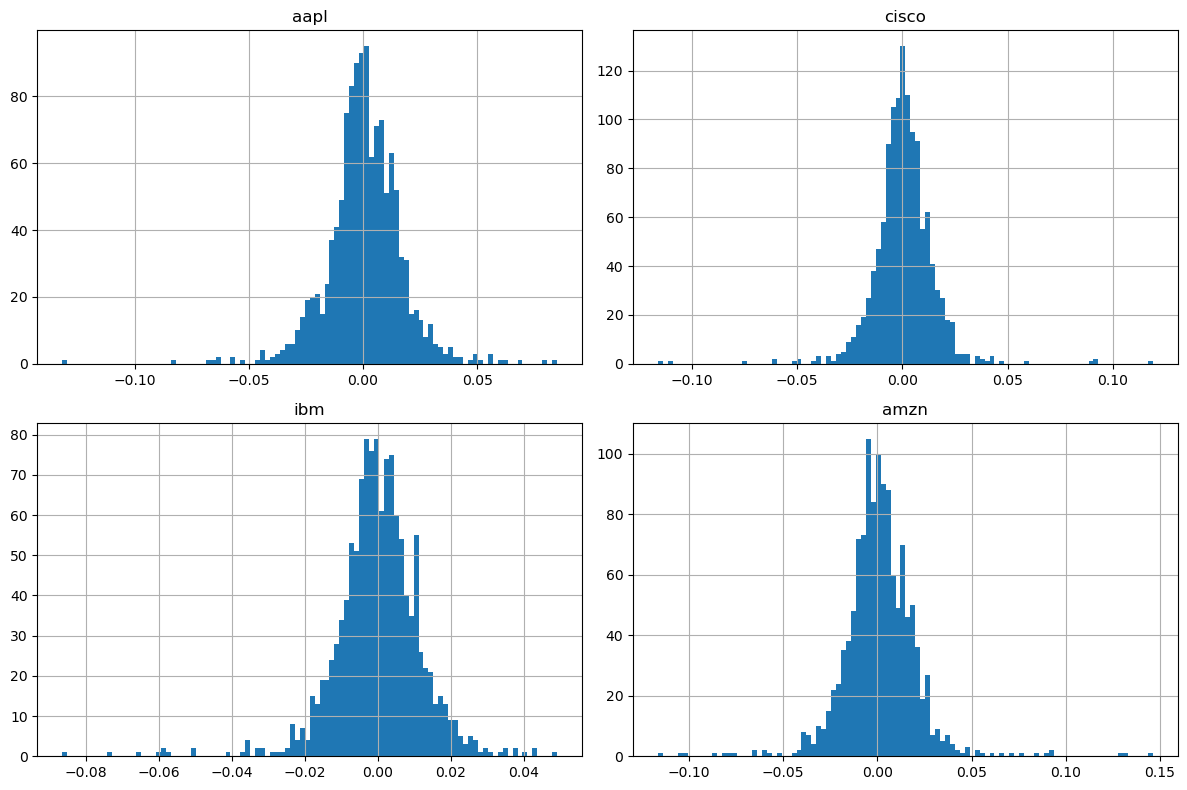

In [10]:
log_return.hist(bins=100,figsize=(12,8))
plt.tight_layout()

In [11]:
# avg logrithim for each stock 
log_return.mean()

aapl     0.000614
cisco    0.000497
ibm      0.000011
amzn     0.001139
dtype: float64

In [12]:
# getting the coveriance 
log_return.cov() *252

,aapl,cisco,ibm,amzn
aapl,0.068326,0.017854,0.014464,0.018986
cisco,0.017854,0.051381,0.018029,0.019956
ibm,0.014464,0.018029,0.035203,0.014939
amzn,0.018986,0.019956,0.014939,0.094470


In [13]:
np.random.seed(101)


num_portfolio = 10000
all_weights = np.zeros((num_portfolio, len(stocks.columns)))
ret_arr = np.zeros(num_portfolio)
vol_arr = np.zeros(num_portfolio)
sharpe_arr = np.zeros(num_portfolio)

for ind in range(num_portfolio):
    #print(stocks.columns)
    weights = np.array(np.random.random(4))
    #print("Random Weights:")
    #print(weights)

    #print("Rebalance")
    weights = weights / np.sum(weights)
    #print(weights)

    # Save weights
    all_weights[ind,:] = weights


    # Expected Return 

    #print('Expected Portfolio Return ')
    ret_arr[ind] = np.sum((log_return.mean()* weights)*252)
    #print(exp_return)

    # Expected Volatility 
    #print('Expected Volatility')
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov()*252, weights)))
    #print(exp_vol)

    # Sharpe Ratio 
    #print('Sharpe Ratio')
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    #print(SR)

In [14]:
sharpe_arr.max()

1.030326055127108

In [15]:
sharpe_arr.argmax()

1420

In [16]:
all_weights[1420, :]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [17]:
max_sr_ret = ret_arr[1420]
max_sr_vol = vol_arr[1420]

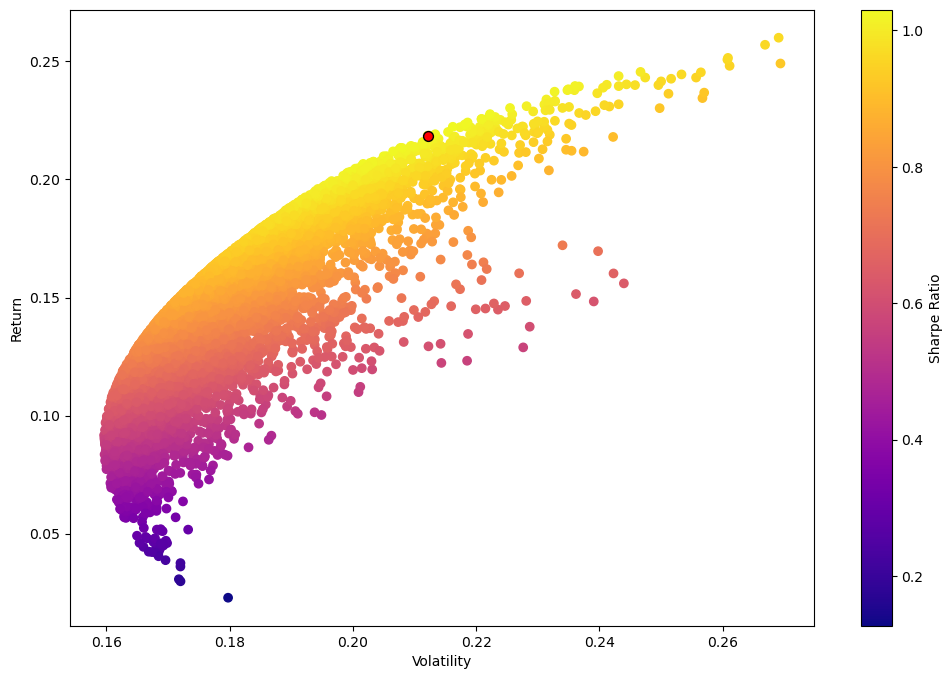

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap="plasma")
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c="red", s= 50, edgecolors='black')

In [19]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_return.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [20]:
from scipy.optimize import minimize

In [21]:
help(minimize)

Help on function minimize in module scipy.optimize._minimize:

minimize(fun, x0, args=(), method=None, jac=None, hess=None, hessp=None, bounds=None, constraints=(), tol=None, callback=None, options=None)
    Minimization of scalar function of one or more variables.

    Parameters
    ----------
    fun : callable
        The objective function to be minimized.

            ``fun(x, *args) -> float``

        where ``x`` is a 1-D array with shape (n,) and ``args``
        is a tuple of the fixed parameters needed to completely
        specify the function.
    x0 : ndarray, shape (n,)
        Initial guess. Array of real elements of size (n,),
        where ``n`` is the number of independent variables.
    args : tuple, optional
        Extra arguments passed to the objective function and its
        derivatives (`fun`, `jac` and `hess` functions).
    method : str or callable, optional
        Type of solver.  Should be one of

            - 'Nelder-Mead' :ref:`(see here) <optimize.mi

In [22]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [23]:
def check_sum(weights):
    # return 0 if the sum of the weights is 1 
    return np.sum(weights) - 1 

In [24]:
# equation type constraints 
cons = ({'type':'eq','fun': check_sum})

In [25]:
# the bounds have to be between 0 and 1 
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [26]:
init_guess = [0.25, 0.25,0.25,-0.25]

In [27]:
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [30]:
# gives us the function, jacobian, get a minimal value 
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0307168725268654
       x: [ 2.662e-01  2.042e-01  5.855e-18  5.296e-01]
     nit: 8
     jac: [-2.642e-05 -1.033e-05  3.399e-01  1.727e-05]
    nfev: 42
    njev: 8

In [31]:
# get the minimal values 
opt_results.x

array([2.66248089e-01, 2.04155803e-01, 5.85469173e-18, 5.29596109e-01])

In [32]:
# gives back daily returns, volatility, and sharpe ratio and the peak we get is 1.03
get_ret_vol_sr(opt_results.x)

array([0.21887018, 0.21234753, 1.03071687])

In [33]:
# check all optimal portfolio 
# efficient frontier : lowest risk possible for the given level of expected return 

frontier_y = np.linspace(0,0.3,100)

In [35]:
#minimize volatility and we dont need to inverse it     
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [38]:
frontier_volatility = []
# for every possible return whats the volatiloity 
for possible_return in frontier_y:
    # for every possible return check the sum and they have to equal to 1.0 
    # for some lamda w we get the first time or the items and then subtract the possible returns 
    cons=({'type': 'eq', 'fun': check_sum}),({'type': 'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    result = minimize(minimize_volatility,init_guess, method='SLSQP', bounds=bounds, constraints=cons)

    #append the function value 
    # result of the function 
    frontier_volatility.append(result['fun'])

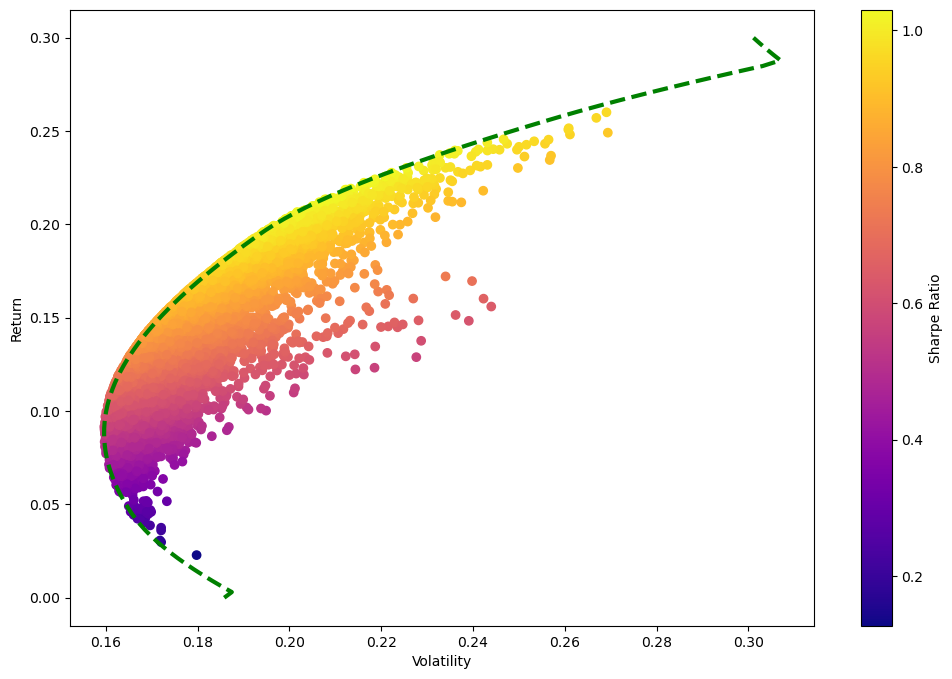

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap="plasma")
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# we get is for each desired level of volatility whats the best return we get 
plt.plot(frontier_volatility, frontier_y, 'g--', linewidth=3)